### 보스턴 주택 데이터셋 로드하기

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

In [6]:
mean =  train_data.mean(axis=0) # row를 기준으로 연산
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 모델 구성

In [27]:
from keras import models
from keras import layers

def build_model(): # 모델을 여러번 생성할 것이므로 함수를 만들어 사용한다.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model

### mse 손실함수
------------------------------
>  평균 제곱 오차(mean squared error)의 약어로 예측과 타겟 사이 거리의 제곱이다. 회귀문제에서 널리 사용되는 손실함수!!
----------------------------
### mae 척도(metrics)
--------------------
>  평균 절대 오차(mean absolute error)의 약어이다. 예측과 타깃 사이의 절댓값이다. 예를 들어 이 예제에서 MAE가 0.5면 예측이 평균적으로 500달러 정도 차이가 난다는 것이다.

### K-겹 검증을 사용한 훈련 검증
---------------------------------------
> K-겹 교차 검증(K-fold cross-validation)은 데이터를 K개의 분할로 나누고 K개의 모델을 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법이다. 모델의 검증점수는 K개의 검증 점수 평균이 된다.

### K-겹 검증하기

In [18]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k # 산술 연산자 몫구하는거 //
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i+1)* num_val_samples]
    # i * num_val_samples 만큼 뒤의 데이터에 저장
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate( # 훈련 데이터 준비 : 다른 분할 전체
        [train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i+1)* num_val_samples:]],
        axis=0)
    
    model = build_model() # 우리가 만든 케라스 모델 구성 (컴파일 포함)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0
             )
     # 모델훈련 verbose=0이므로 훈련과정이 출력되지 않음
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    



처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [19]:
all_scores

[2.1700985431671143, 2.9056496620178223, 2.505882740020752, 2.8275599479675293]

In [20]:
np.mean(all_scores)

2.6022977232933044

#### 모델을 개선하기위해 epochs를 500으로 늘려보자.

In [28]:
k = 4

num_val_samples = len(train_data) // k # 산술 연산자 몫구하는거 //
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  #검증 데이터 준비: k번째 분할    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)
history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [29]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

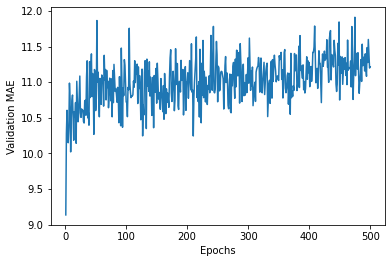

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

이 그래프는 변동이 심하기 때문에 보기가 어렵다. 다음과 같이 해보겠다.
* 곡선의 다른 부분과 스케일이 많이 다른 첫 10개를 제외한다.
* 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체한다.
#### 지수 이동 평균은 이동 평균에 factor를 곱하고 현재 포인트에 (1 - factor)를 곱해 합산하는 방법이다.

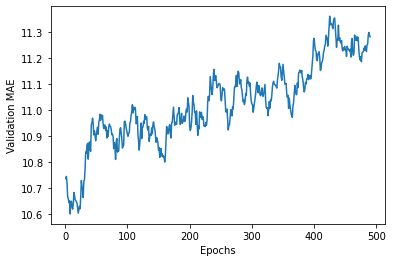

In [31]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 최종 모델 훈련하기
80번째 에포크 이후로 줄어드는 것이 멈추었다. 이 지점 이후로는 과대 적합이 시작된다.

In [42]:
model = build_model()
model.fit(train_data, train_targets,
         epochs = 100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 748us/step - loss: 712651.5000 - mean_absolute_error: 787.8569


In [43]:
test_mae_score

787.8568725585938

## 왤케 많이 차이나지?ㅋㅋㅋㅋ